<center>
    
--- 
## Economic Growth - OLG Model
    
## Professor Pablo A. Bolaños Marín
---
    
</center>

## Replicating our class example

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from sympy import symbols, Eq, solve
from sympy import integrate


In [103]:
"|DEFINE PARAMETERS AND ARRAYS"
# Parameters
K_size = 10
c1_size = 10                    # Model domain
c2_size = 10
x_size = 10
A = 1                            # Total Factor Productivity
N = 5                            # Capital stock
alpha = 0.50                     # Output elasticity of capital
s = 0.30                         # Savings rate
d = 0.10                         # Depreciation rate
beta = 0.5
r = 0.03
w1 = 10
w2 = 11
h1 = 3
h2 = 2
kappa = 2
#Arrays
K = np.arange(K_size)            # Create empty array of K
C1 = np.arange(c1_size)
C2 = np.arange(c2_size)
X = np.arange(x_size)


"|DEFINE FUNCTIONS"
def output(K):   # Cobb-Douglas Production Function
    Y = A * (K)**(alpha) * (N)**(1-alpha)    
    return Y

def utility(C1,C2):
    u = C1*C2**(beta)
    return u

def capital(K):
    Kt1 = kappa*K**alpha
    return Kt1

def line(X):
    x = X
    return x

"|POPULATE ARRAYS"
Y = output(K)
Kap = capital(K)
U = utility(C1,C2)
linea = line(X)

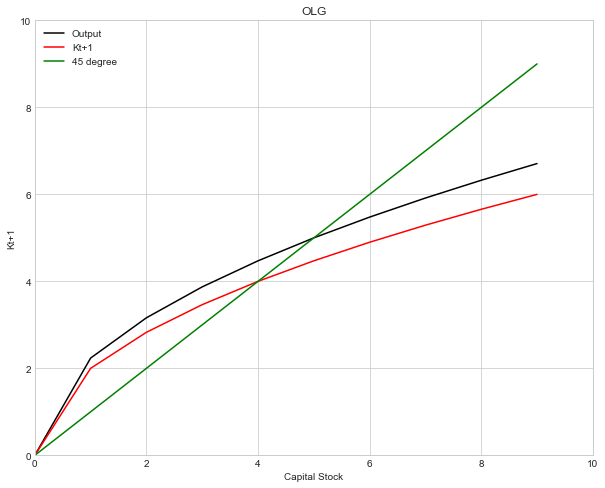

In [114]:
"|PLOT THE MODEL"
y_max = np.max(Y)
v = [0, K_size, 0, 10]

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(K, Y, "k", ls = '-', label="Output")
#ax.plot(K, U, "b", ls = '-', label="Utility")
ax.plot(K, Kap, "r", ls = '-', label="Kt+1")
ax.plot(K, linea, "g", ls = '-', label="45 degree")
ax.set(title="OLG", xlabel="Capital Stock",ylabel="Kt+1")
# x = np.linspace(*ax.get_xlim())
# ax.plot(x, x)
plt.legend(loc=2)
plt.axis(v)
plt.show()

### Another way found in numecon by Jeppe Druedhal

https://github.com/NumEconCopenhagen/NumEconNotebooks/tree/master/macro

In [ ]:
!pip install numecon

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

import numecon.macro.OLG as OLG

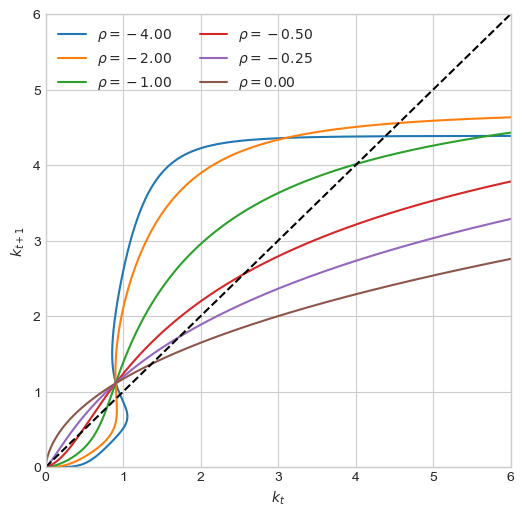

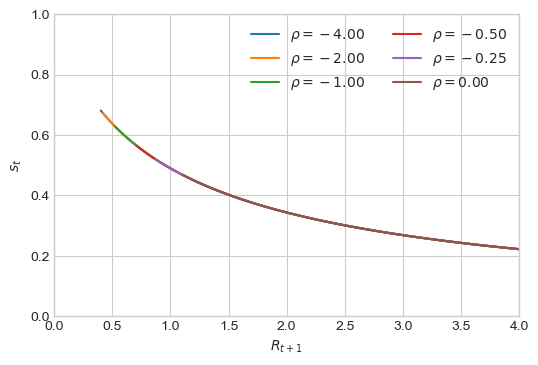

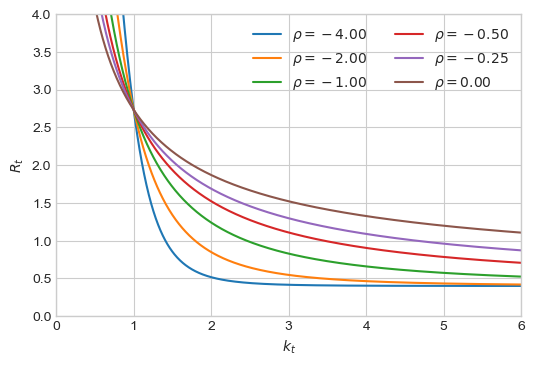

In [116]:
# 1. create figure
fig_trans = plt.figure(figsize=(6,6),dpi=100)
ax_trans = fig_trans.add_subplot(1,1,1)
    
fig_s = plt.figure(figsize=(6,4),dpi=100)
ax_s = fig_s.add_subplot(1,1,1)

fig_R = plt.figure(figsize=(6,4),dpi=100)
ax_R = fig_R.add_subplot(1,1,1)

# 2. loop over rho
for rho in [-4,-2,-1,-0.5,-0.25,0]:
    
    # a. setup model
    model = OLG.OLGModel(name='baseline',rho=rho)    
    
    # b. transition curve
    model.find_transition_curve()
    model.plot_transition_curve(ax_trans,label=f'$\\rho = {rho:7.2f}$')

    # c. interest rate function
    model.find_interest_rate_function()
    model.plot_interest_rate_function(ax_R,label=f'$\\rho = {rho:7.2f}$')
    
    # d. saving function
    model.find_saving_function()
    model.plot_saving_function(ax_s,label=f'$\\rho = {rho:7.2f}$')
    
# 3. figure details
model.plot_45(ax_trans)   
ax_trans.legend(loc='upper left',ncol=2)
ax_s.legend(loc='upper right',ncol=2)
ax_R.legend(loc='upper right',ncol=2)

# 4. print
fig_trans.savefig('OLG_transition_curves.pdf')
fig_R.savefig('OLG_interest_rate_functions.pdf')
fig_s.savefig('OLG_saving_functions.pdf')
fig_trans.savefig('OLG_transition_curves.png')
fig_R.savefig('OLG_interest_rate_functions.png')
fig_s.savefig('OLG_saving_functions.png')

### Interactive interest rate function

In [118]:
OLG.interactive_interest_rate_function()

interactive(children=(FloatSlider(value=0.33, continuous_update=False, description='$\\alpha$', max=0.99, min=…

### Interactive saving function

In [119]:
OLG.interactive_saving_function()

interactive(children=(FloatSlider(value=0.7142857142857143, continuous_update=False, description='$\\beta$', m…

### Interactive transition function

In [121]:
OLG.interactive_transition_curve()

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='$\\sigma$', max=16.0, min=0…

### Replicating the class example on Python

### FOC

In [10]:
c1 = sp.Symbol('c1')
c2 = sp.Symbol('c2')
beta = sp.Symbol('beta')

u1 = sp.diff(utility(c1,c2),c1)
u2 = sp.diff(utility(c1,c2),c2)

print(u1)
print(u2)

c2**beta
beta*c1*c2**beta/c2
